In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,recall_score,precision_score,f1_score

df=pd.read_csv("RemodelledNEOData.csv")

df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,minimum_relative_velocity,maximum_relative_velocity,average_relative_velocity,minimum_miss_distance,maximum_miss_distance,average_miss_distance,min_miss_distance_classification,is_hazardous
0,2000433,433 Eros (A898 PA),10.410,22.006703,49.208483,13053.955090,21902.588656,18781.537526,2.260935e+07,7.468781e+07,4.580728e+07,Near-Midway,False
1,2000719,719 Albert (A911 TB),15.590,2.025606,4.529393,25865.435669,27596.036185,26592.017271,3.073963e+07,4.708597e+07,3.619772e+07,Midway,False
2,2000887,887 Alinda (A918 AA),13.880,4.451998,9.954971,21983.859043,46166.696835,31481.958026,2.046181e+07,6.635238e+07,4.320281e+07,Near-Midway,False
3,2001036,1036 Ganymed (A924 UB),9.250,37.545248,83.953727,51496.925534,69706.339208,60913.530180,5.372123e+07,7.424165e+07,6.167132e+07,Midway,False
4,2001221,1221 Amor (1932 EA1),17.380,0.888290,1.986278,30126.330098,56162.143856,36595.942004,1.574921e+07,5.505391e+07,2.485125e+07,Near-Midway,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33509,54460731,(2016 EU362),23.859,0.044953,0.100517,33430.686642,55469.100141,42988.772403,1.615975e+06,4.530098e+07,2.571312e+07,Near,False
33510,54460877,(2024 NJ3),26.889,0.011137,0.024902,17117.441454,67448.973678,37590.215171,4.202174e+05,7.010434e+07,3.417498e+07,Near,False
33511,54461065,(2024 NK3),28.688,0.004864,0.010875,28474.656920,38105.036383,32231.347027,1.187324e+05,7.213876e+07,3.288933e+07,Near,False
33512,54462805,(2024 NM3),25.315,0.022991,0.051409,30660.798810,57886.161918,42671.062361,1.795494e+07,6.087377e+07,3.488720e+07,Near-Midway,False


### Number of Features

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33514 entries, 0 to 33513
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   neo_id                            33514 non-null  int64  
 1   name                              33514 non-null  object 
 2   absolute_magnitude                33511 non-null  float64
 3   estimated_diameter_min            33511 non-null  float64
 4   estimated_diameter_max            33511 non-null  float64
 5   minimum_relative_velocity         33514 non-null  float64
 6   maximum_relative_velocity         33514 non-null  float64
 7   average_relative_velocity         33514 non-null  float64
 8   minimum_miss_distance             33514 non-null  float64
 9   maximum_miss_distance             33514 non-null  float64
 10  average_miss_distance             33514 non-null  float64
 11  min_miss_distance_classification  33514 non-null  object 
 12  is_h

### Basic Statistics of All Features

In [40]:
df.describe(include="all")

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,minimum_relative_velocity,maximum_relative_velocity,average_relative_velocity,minimum_miss_distance,maximum_miss_distance,average_miss_distance,min_miss_distance_classification,is_hazardous
count,3.351400e+04,33514,33511.000000,33511.000000,33511.000000,33514.000000,33514.000000,33514.000000,3.351400e+04,3.351400e+04,3.351400e+04,33514,33514
unique,NaN,33514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2
top,NaN,433 Eros (A898 PA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Near-Midway,False
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16756,31021
mean,2.306230e+07,NaN,23.427700,0.138637,0.310002,37265.677552,63842.461657,48305.080958,1.617690e+07,5.045443e+07,3.341065e+07,NaN,NaN
std,2.474532e+07,NaN,2.919482,0.354701,0.793136,21590.034726,30807.703549,23016.877920,1.605941e+07,2.630384e+07,1.737724e+07,NaN,NaN
min,2.000433e+06,NaN,9.250000,0.000511,0.001143,203.346433,1418.218469,1418.218469,6.745533e+03,9.316925e+03,9.316925e+03,NaN,NaN
25%,3.577470e+06,NaN,21.220000,0.020163,0.045086,21742.303971,40029.496476,31889.328581,3.779881e+06,2.643594e+07,2.114953e+07,NaN,NaN
50%,3.788052e+06,NaN,23.700000,0.048368,0.108153,33202.960220,62991.986683,45097.111506,1.019762e+07,6.410371e+07,3.675075e+07,NaN,NaN
75%,5.420045e+07,NaN,25.600000,0.151550,0.338875,48822.240495,82654.415272,60928.985218,2.434226e+07,7.207348e+07,4.578403e+07,NaN,NaN


### Checking Null Values

In [41]:
df.isna().sum()

neo_id                              0
name                                0
absolute_magnitude                  3
estimated_diameter_min              3
estimated_diameter_max              3
minimum_relative_velocity           0
maximum_relative_velocity           0
average_relative_velocity           0
minimum_miss_distance               0
maximum_miss_distance               0
average_miss_distance               0
min_miss_distance_classification    0
is_hazardous                        0
dtype: int64

### Dropping Null Values

In [42]:
print(df[df["absolute_magnitude"].isna()])
df.dropna(inplace=True)
df.isna().sum()

         neo_id          name  absolute_magnitude  estimated_diameter_min  \
7243    3511355   (2010 DJ77)                 NaN                     NaN   
8702    3592397  (2010 AW108)                 NaN                     NaN   
21563  54049909  (2010 CJ188)                 NaN                     NaN   

       estimated_diameter_max  minimum_relative_velocity  \
7243                      NaN               47896.321689   
8702                      NaN               22559.617403   
21563                     NaN               61048.333919   

       maximum_relative_velocity  average_relative_velocity  \
7243                83749.165989               60160.827844   
8702                22559.617403               22559.617403   
21563               61048.333919               61048.333919   

       minimum_miss_distance  maximum_miss_distance  average_miss_distance  \
7243            7.584209e+06           6.646400e+07           3.937456e+07   
8702            5.149683e+07           5.

neo_id                              0
name                                0
absolute_magnitude                  0
estimated_diameter_min              0
estimated_diameter_max              0
minimum_relative_velocity           0
maximum_relative_velocity           0
average_relative_velocity           0
minimum_miss_distance               0
maximum_miss_distance               0
average_miss_distance               0
min_miss_distance_classification    0
is_hazardous                        0
dtype: int64

### Distribution of Hazardous and Non Hazardous Asteroids

is_hazardous
False    31018
True      2493
Name: count, dtype: int64


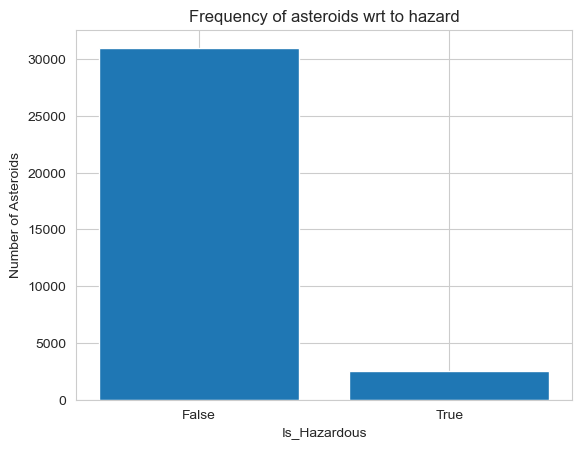

In [43]:
hazardous=df['is_hazardous'].value_counts()
print(hazardous)
plt.figure()
plt.title("Frequency of asteroids wrt to hazard")
plt.bar(hazardous.index.astype(str),hazardous.values)
plt.xlabel("Is_Hazardous")
plt.ylabel("Number of Asteroids")
plt.show()

### Pie chart visualization of prportion of hazardous and non-hazardous NEOs

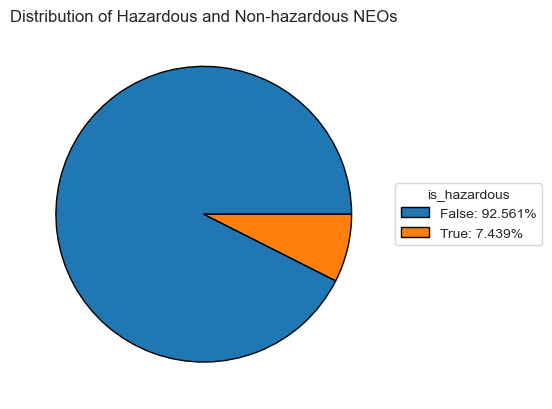

In [44]:
le=LabelEncoder()
encoded_is_hazardous=pd.Series(le.fit_transform(df["is_hazardous"])) # the array is converted into a series
encoded_is_hazardous
isHazardousCount=encoded_is_hazardous.value_counts()
isHazardousCount

plt.figure()
plt.pie(hazardous.values,labels=None,wedgeprops={'edgecolor':'black'})
labels=le.inverse_transform(isHazardousCount.index)
percentage=[f"{value / isHazardousCount.sum() * 100:.3f}%" for value in isHazardousCount.values]


plt.legend([f"{label}: {percentage}" for label, percentage in zip(labels, percentage)],
           title="is_hazardous", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Distribution of Hazardous and Non-hazardous NEOs")
plt.show()

### List top five hazardous asteroids which have maximum miss distance.

In [45]:
hazardous_df=df[df["is_hazardous"]==True]
hazardous_df.sort_values(by='maximum_miss_distance',ascending=False).head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,minimum_relative_velocity,maximum_relative_velocity,average_relative_velocity,minimum_miss_distance,maximum_miss_distance,average_miss_distance,min_miss_distance_classification,is_hazardous
619,2154590,154590 (2003 MA3),21.71,0.120936,0.270421,21735.822588,96430.663459,47835.088824,4.521641e+06,7.479666e+07,4.406642e+07,Near-Midway,True
551,2152561,152561 (1991 RB),19.10,0.402305,0.899580,40415.634315,100373.578380,64493.236240,6.622453e+06,7.479095e+07,4.099785e+07,Near-Midway,True
13414,3739011,(2015 YU7),21.37,0.141434,0.316257,21735.249327,101370.840619,54063.410200,3.692227e+06,7.478985e+07,4.430805e+07,Near,True
14417,3755311,(2016 NQ32),21.20,0.152952,0.342011,20727.413687,84361.636836,49822.922803,8.660201e+06,7.478908e+07,3.441440e+07,Near-Midway,True
26093,54230517,(2021 XL6),21.19,0.153658,0.343590,49615.909919,68282.189737,58327.143299,4.287637e+06,7.478797e+07,3.688040e+07,Near-Midway,True


### List top five non-hazardous asteroids which have minimum relative velocity.

In [46]:
non_hazardous_df=df[df["is_hazardous"]==False]
non_hazardous_df.sort_values(by='minimum_relative_velocity',ascending=False).head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,minimum_relative_velocity,maximum_relative_velocity,average_relative_velocity,minimum_miss_distance,maximum_miss_distance,average_miss_distance,min_miss_distance_classification,is_hazardous
1333,2343158,343158 Marsyas (2009 HC82),16.00,1.677085,3.750075,230051.873217,291781.106613,260830.496284,3.207416e+07,7.262425e+07,5.006117e+07,Midway,False
20374,3989287,(2020 BZ12),18.12,0.631764,1.412668,207168.665845,279142.249206,252291.884736,1.318612e+07,6.473682e+07,4.019733e+07,Near-Midway,False
17255,3799259,(2017 UR52),21.20,0.152952,0.342011,194056.414989,194056.414989,194056.414989,4.888464e+07,4.888464e+07,4.888464e+07,Midway,False
11289,3683246,(2014 PP69),20.00,0.265800,0.594347,167152.481510,167152.481510,167152.481510,6.676902e+07,6.676902e+07,6.676902e+07,Midway,False
30460,54373333,(2023 LC2),19.87,0.282199,0.631015,164976.500065,164976.500065,164976.500065,6.625388e+07,6.625388e+07,6.625388e+07,Midway,False


 ### What are the minimum miss distance classifications? Visualize.

min_miss_distance_classification
Near-Midway    16755
Near            8379
Midway          8376
Far                1
Name: count, dtype: int64


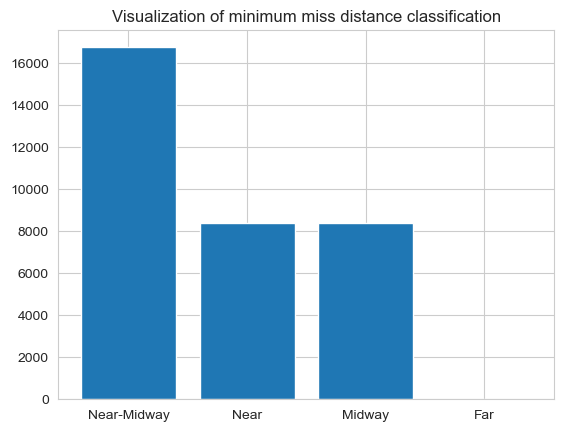

In [47]:
minMissDis=df['min_miss_distance_classification'].value_counts()
print(minMissDis)

plt.figure()
plt.title("Visualization of minimum miss distance classification")
plt.bar(minMissDis.index,minMissDis.values)
plt.show()

### Check if the farthest asteroid is non-hazardous

In [48]:

far_hazardous_df=df[(df["is_hazardous"]==False) & (df['min_miss_distance_classification']=='Far')]
print(far_hazardous_df['name'])
print(far_hazardous_df['average_relative_velocity'])

819    177651 (2004 XM14)
Name: name, dtype: object
819    93658.896444
Name: average_relative_velocity, dtype: float64


### What is the maximum relative velocity of a hazardous asteroid

In [49]:

# Find the maximum relative velocity for hazardous asteroids
max_velocity = df[df['is_hazardous'] == True]['maximum_relative_velocity'].max()

# Filter the DataFrame to get the rows with the maximum relative velocity among hazardous asteroids
maxVel_Haz_df = df[(df['maximum_relative_velocity'] == max_velocity) & (df['is_hazardous'] == True)]

maxVel_Haz_df


,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,minimum_relative_velocity,maximum_relative_velocity,average_relative_velocity,minimum_miss_distance,maximum_miss_distance,average_miss_distance,min_miss_distance_classification,is_hazardous
8247,3566441,(2011 KE),19.8,0.291444,0.651688,94634.219911,194676.462159,142544.12219,1.044249e+07,7.123295e+07,4.233950e+07,Near-Midway,True


### Are there any correlations between relative velocity and the size of NEOs (both minimum and maximum estimated diameters)? 

In [50]:
cols = ['estimated_diameter_min', 'estimated_diameter_max', 'minimum_relative_velocity', 'maximum_relative_velocity', 'average_relative_velocity']
correlation_matrix = df[cols].corr()
correlation_matrix

,estimated_diameter_min,estimated_diameter_max,minimum_relative_velocity,maximum_relative_velocity,average_relative_velocity
estimated_diameter_min,1.000000,1.000000,0.159083,0.168254,0.185679
estimated_diameter_max,1.000000,1.000000,0.159083,0.168254,0.185679
minimum_relative_velocity,0.159083,0.159083,1.000000,0.594963,0.889040
maximum_relative_velocity,0.168254,0.168254,0.594963,1.000000,0.880335
average_relative_velocity,0.185679,0.185679,0.889040,0.880335,1.000000


### Conclusion of the above correlation

1. There is a perfect positive correlation between estimated_diameter_min and estimated_diameter_max. This indicates that NEOs with larger minimum diameters also tend to have larger maximum diameters, which is expected.

2. The strong correlation between different measures of velocity indicates that NEOs tend to maintain consistent relative velocities.

3. The strong positive correlation between size and velocity implies that larger NEOs tend to move faster than smaller ones. 
<ul>   
 <li> The dynamics of larger NEOs could result in higher velocities due to gravitational interactions with other celestial bodies.</li>
 <li> Larger, faster-moving NEOs might pose a higher risk due to their higher impact energy.</li>
</ul>

### Distribution of all features among the asteroids

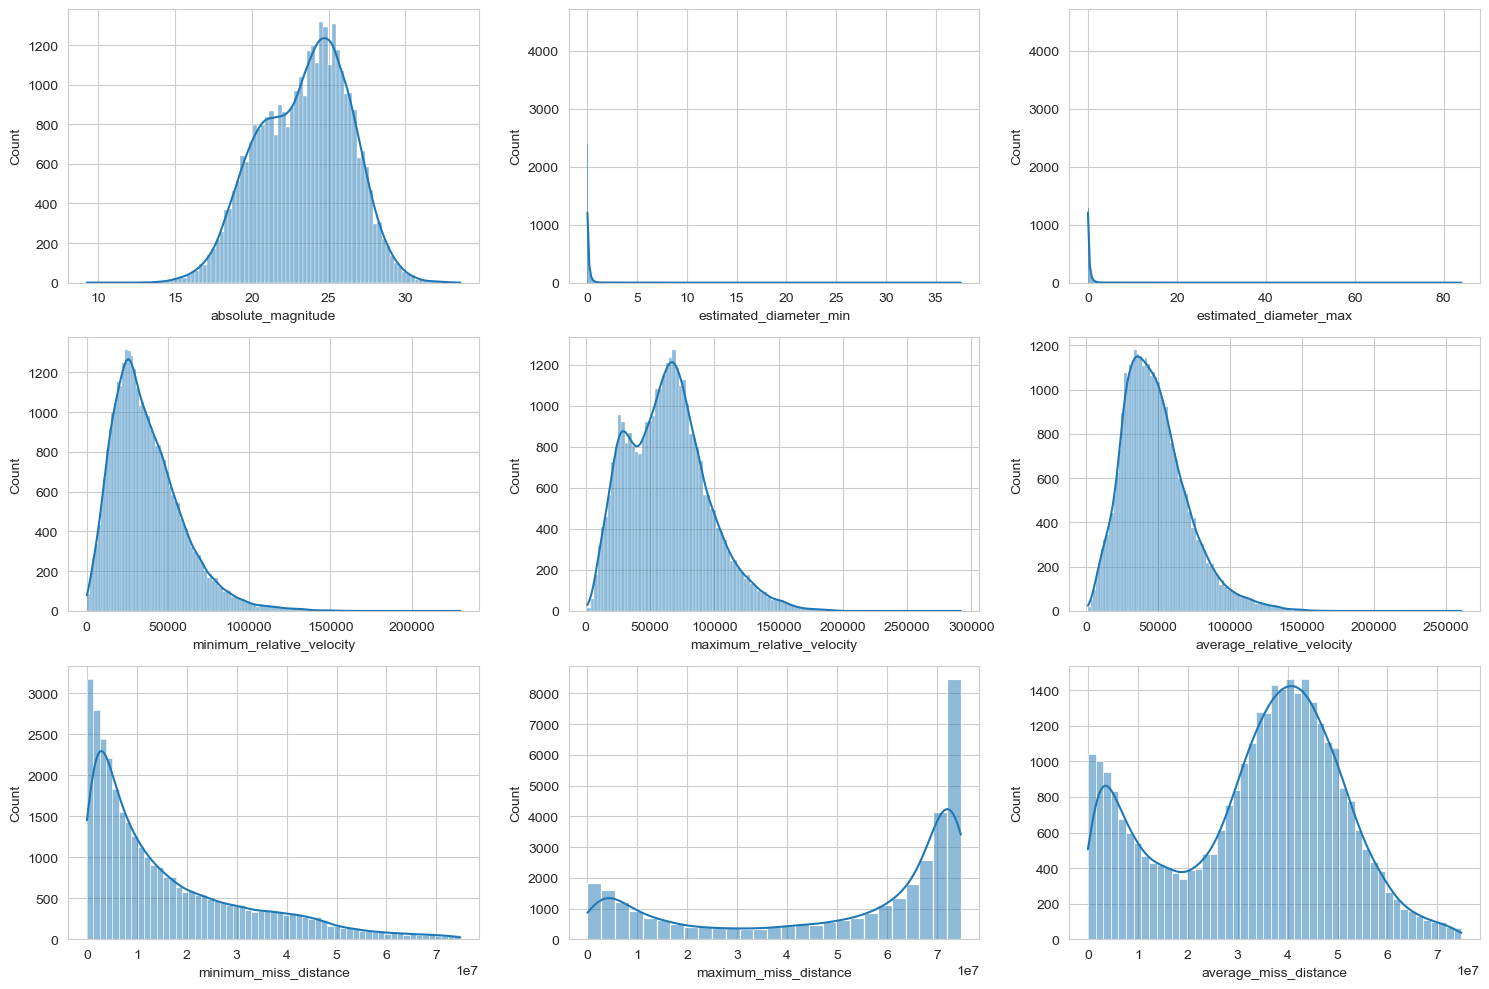

In [51]:
plt.figure(figsize=(15,10))

i=1
for column in df.drop(columns=["neo_id","name","min_miss_distance_classification","is_hazardous"]):
    plt.subplot(3,3,i)
    sns.histplot(df[column],kde=True)
    plt.xlabel(column)
    i=i+1

plt.tight_layout()
plt.show()

### Conclusion fron the above histrogram exploration

1. The distribution of absolute magnitude is roughly normal with a peak around 25 which suggests that most objects have an absolute magnitude around 25.

2. The distribution of estimated diameter min is heavily skewed to the right with most values close to zero which indicates that the majority of objects have a very small minimum estimated diameter. 

3. Similarly, the distribution of estimated diameter max is heavily skewed to the right with most values close to zero which indicates that most objects have a very small maximum estimated diameter. 

4. The distribution of minimum relative velocity is right-skewed, peaking at low values and tapering off as the velocity increases which indicates that most objects have a relatively low minimum relative velocity.

5. The distribution of maximum relative velocity has a peak at lower values and decreases as the velocity increases, with some minor secondary peaks which suggests that most objects have a low maximum relative velocity, but there are some with higher velocities.

6. The distribution of average relative velocity is similar to the minimum and maximum relative velocity, with a peak at lower values and tapering off as the velocity increases. So, most objects have a low average relative velocity.

7. The distribution of minimum miss distance is right-skewed, with a peak at very low values and tapering off as the distance increases which indicates that most objects have a very small minimum miss distance from Earth.

8. The distribution of maximum miss distance has a peak at the higher end, suggesting a large number of objects have a maximum miss distance around 70 million units. There is a clear bimodal distribution, indicating two distinct groups of objects with different maximum miss distances.

9. The distribution of average miss distance is bimodal, with peaks around 10 million and 40-50 million units which indicates that there are two distinct groups of objects with different average miss distances.

### Checking for Outliers

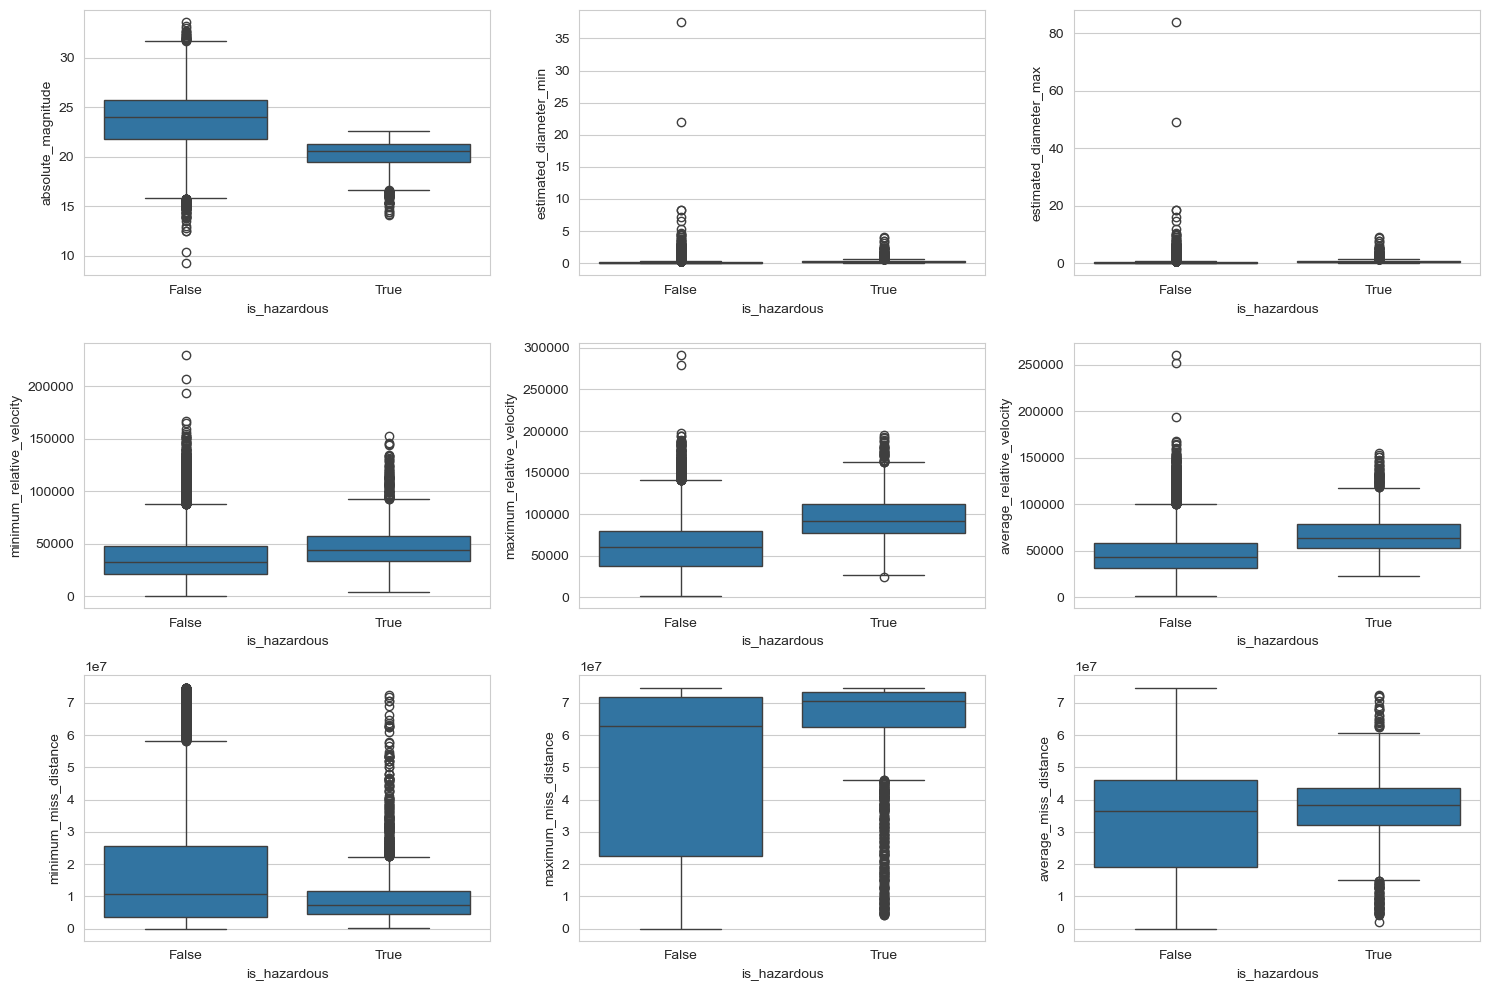

In [52]:
plt.figure(figsize=(15,10))

i=1
for column in df.drop(columns=["neo_id","name","min_miss_distance_classification","is_hazardous"]):
    plt.subplot(3,3,i)
    sns.boxplot(x=df["is_hazardous"],y=df[column])
    i=i+1

plt.tight_layout()
plt.show()

### Conclusions from the above boxplot explorations

1. Hazardous objects tend to have lower (brighter) absolute magnitudes compared to non-hazardous objects. Lower median absolute magnitude for hazardous objects indicates they are generally brighter.

2. The minimum estimated diameter for both hazardous and non-hazardous objects is generally very small, with some outliers and there is no significant difference between the two categories.

3. Similar to the minimum diameter, the maximum estimated diameter for both categories is generally small, with some outliers and there is no significant difference between the two categories.

4. In the minimum relative velocity distribution, both categories have similar medians and ranges, with hazardous objects having slightly higher outliers.

5. In the maximum relative velocity distribution, both categories have similar medians and ranges, with hazardous objects having slightly higher outliers.

6. In the average relative velocity distribution, both categories have similar medians and ranges, with hazardous objects having slightly higher outliers.

7. Hazardous objects have a smaller minimum miss distance compared to non-hazardous objects. Lower median minimum miss distance for hazardous objects indicates they come closer to Earth.

8. Non-hazardous objects have a larger maximum miss distance compared to hazardous objects. Higher median maximum miss distance for non-hazardous objects indicates they stay farther away from Earth.

9. Hazardous objects have a smaller average miss distance compared to non-hazardous objects. Lower median average miss distance for hazardous objects indicates they come closer to Earth on average.

### Class Distribution of Asteroids Based on Minimum Miss Distance

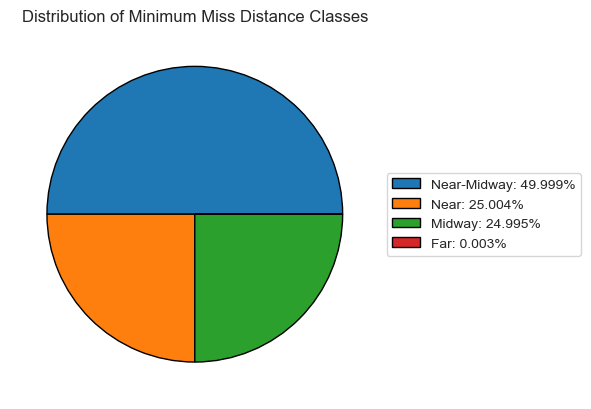

In [53]:
le=LabelEncoder()
encoded_miss_distance=pd.Series(le.fit_transform(df["min_miss_distance_classification"]))
encoded_miss_distance
missDistanceClassCount=encoded_miss_distance.value_counts()
missDistanceClassCount

plt.figure()
plt.pie(missDistanceClassCount.values, 
        labels=None,  
        wedgeprops={"edgecolor": "black"})


labels = le.inverse_transform(missDistanceClassCount.index)
percentages = [f"{value / missDistanceClassCount.sum() * 100:.3f}%" for value in missDistanceClassCount.values]


plt.legend([f"{label}: {percentage}" for label, percentage in zip(labels, percentages)],
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Distribution of Minimum Miss Distance Classes")
plt.show()

### Correlation Matrix Heatmap

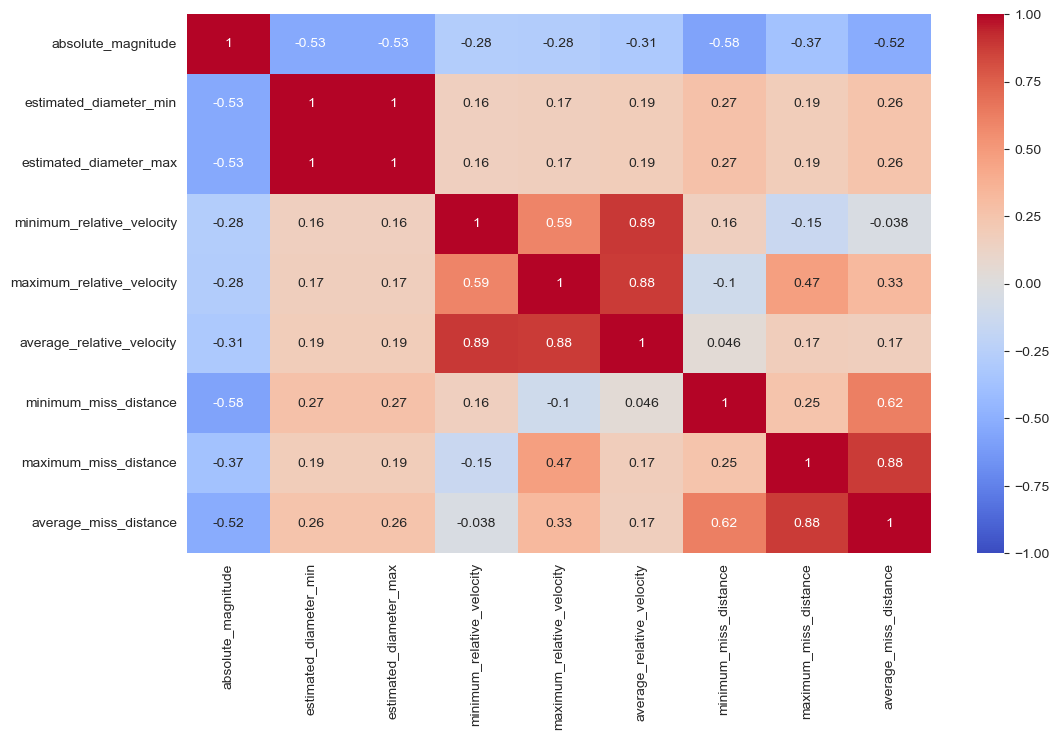

In [54]:
corr_matrix=df.drop(columns=["neo_id","name","min_miss_distance_classification","is_hazardous"]).corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,vmin=-1)
plt.show()

### Creating Training and Testing Data

In [55]:
x=df.iloc[:,2:12]
y=df["is_hazardous"]

le=LabelEncoder()
x["min_miss_distance_classification"]=le.fit_transform(x["min_miss_distance_classification"])
x.iloc[:,:]=StandardScaler().fit_transform(x.iloc[:,:])
y=LabelEncoder().fit_transform(y)

x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=99)

x_train

C:\Users\PIULI SAHA\AppData\Local\Temp\ipykernel_26264\1653273621.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.90451931 -1.50746021  0.90451931 ... -0.30147045  0.90451931
  0.90451931]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  x.iloc[:,:]=StandardScaler().fit_transform(x.iloc[:,:])


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,minimum_relative_velocity,maximum_relative_velocity,average_relative_velocity,minimum_miss_distance,maximum_miss_distance,average_miss_distance,min_miss_distance_classification
23260,-0.739080,0.026679,0.026679,-0.695999,-0.944779,-0.957262,0.744264,0.406997,0.654949,-1.507460
30919,1.713446,-0.375420,-0.375420,0.981808,1.219071,1.374031,-0.981801,0.411627,-0.147542,-0.301470
28289,-0.156777,-0.200009,-0.200009,-0.683032,-1.040684,-0.873867,1.046579,0.855362,1.863917,-1.507460
30907,0.243985,-0.279510,-0.279510,0.657581,-0.401878,0.137168,-0.497955,-1.607138,-1.451917,0.904519
19574,0.569390,-0.318967,-0.318967,-0.893737,0.316662,-0.441596,-0.406949,0.909826,0.773256,0.904519
...,...,...,...,...,...,...,...,...,...,...
19843,0.336469,-0.292529,-0.292529,0.047412,0.672904,0.301392,-0.721650,0.909019,0.706821,0.904519
23752,1.737423,-0.375910,-0.375910,-1.041737,-0.154278,-0.817974,-0.901236,0.706785,-0.125048,-0.301470
21575,0.709828,-0.331337,-0.331337,0.015611,-0.851772,-0.465005,-0.625903,-1.685245,-1.570151,0.904519
23590,1.816205,-0.377413,-0.377413,-1.077255,-0.044091,-0.700969,-0.855755,0.842354,-0.199497,-0.301470


### Logistic Regression

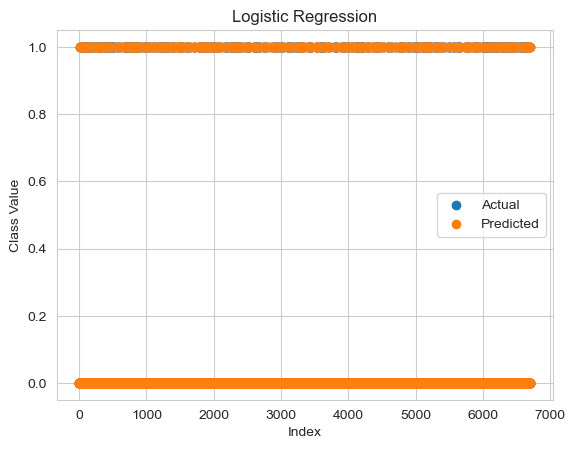

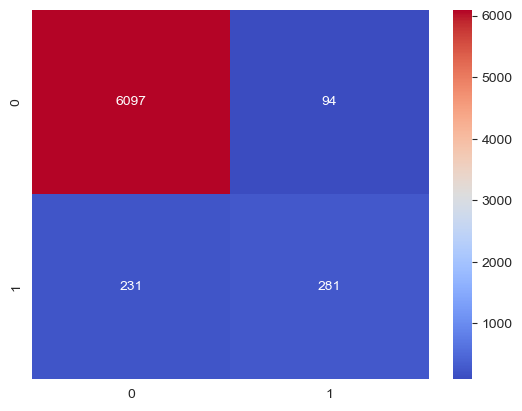

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6191
           1       0.75      0.55      0.63       512

    accuracy                           0.95      6703
   macro avg       0.86      0.77      0.80      6703
weighted avg       0.95      0.95      0.95      6703

Accuracy:  0.951514247351932
Precision:  0.7493333333333333
Recall:  0.548828125
F1 Score:  0.6335963923337091


In [56]:
from sklearn.linear_model import LogisticRegression 

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Logistic Regression")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",lr_accuracy)
print("Precision: ",lr_precision)
print("Recall: ",lr_recall)
print("F1 Score: ",lr_f1)

### K Nearest Neighbors

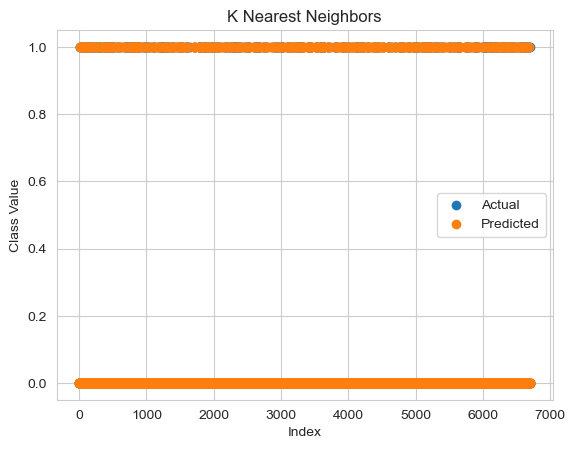

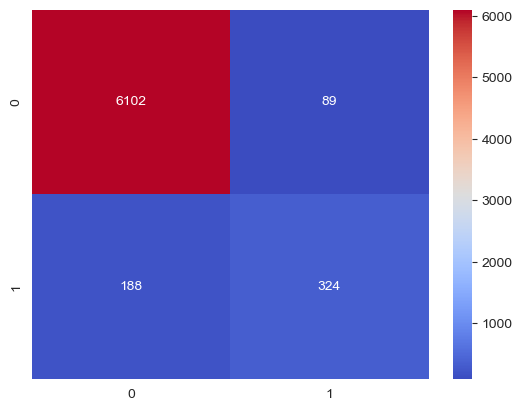

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6191
           1       0.78      0.63      0.70       512

    accuracy                           0.96      6703
   macro avg       0.88      0.81      0.84      6703
weighted avg       0.96      0.96      0.96      6703

Accuracy:  0.9586752200507236
Precision:  0.784503631961259
Recall:  0.6328125
F1 Score:  0.7005405405405405


In [57]:
from sklearn.neighbors import KNeighborsClassifier

lr=KNeighborsClassifier()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("K Nearest Neighbors")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",knn_accuracy)
print("Precision: ",knn_precision)
print("Recall: ",knn_recall)
print("F1 Score: ",knn_f1)

### Naive Bayes

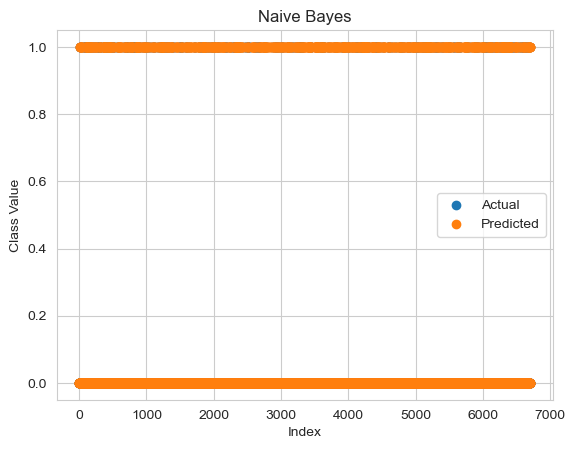

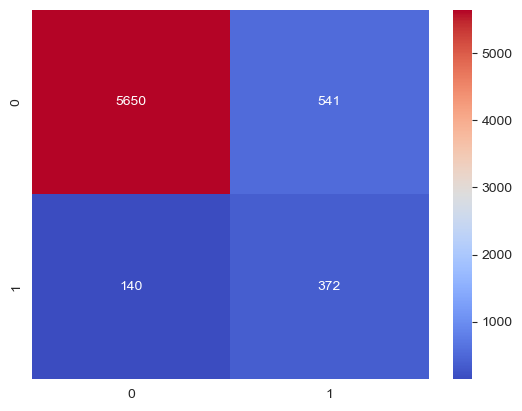

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      6191
           1       0.41      0.73      0.52       512

    accuracy                           0.90      6703
   macro avg       0.69      0.82      0.73      6703
weighted avg       0.93      0.90      0.91      6703

Accuracy:  0.8984036998358944
Precision:  0.40744797371303393
Recall:  0.7265625
F1 Score:  0.5221052631578947


In [58]:
from sklearn.naive_bayes import GaussianNB

lr=GaussianNB()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Naive Bayes")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",nb_accuracy)
print("Precision: ",nb_precision)
print("Recall: ",nb_recall)
print("F1 Score: ",nb_f1)

### Decision Trees

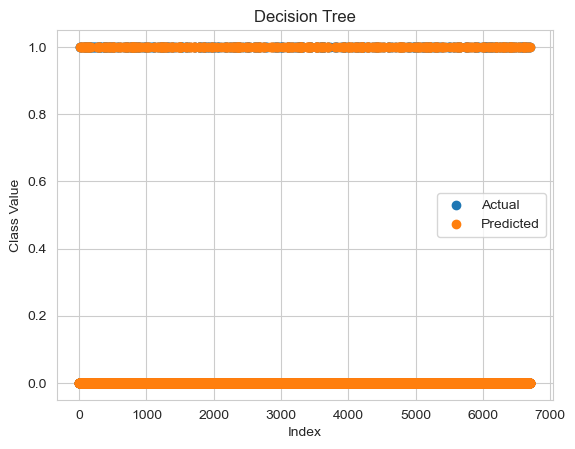

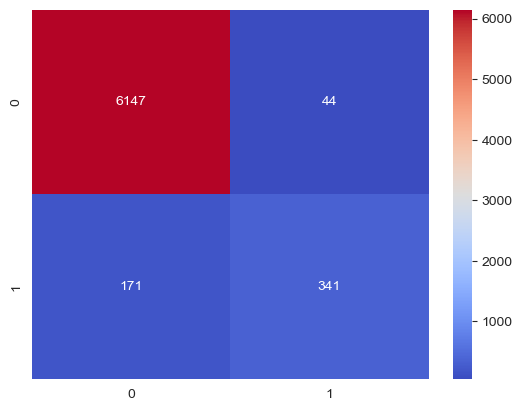

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6191
           1       0.89      0.67      0.76       512

    accuracy                           0.97      6703
   macro avg       0.93      0.83      0.87      6703
weighted avg       0.97      0.97      0.97      6703

Accuracy:  0.9679248097866627
Precision:  0.8857142857142857
Recall:  0.666015625
F1 Score:  0.7603121516164995


In [59]:
from sklearn.tree import DecisionTreeClassifier

lr=DecisionTreeClassifier(max_depth=5)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Decision Tree")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",dt_accuracy)
print("Precision: ",dt_precision)
print("Recall: ",dt_recall)
print("F1 Score: ",dt_f1)

### Random Forest

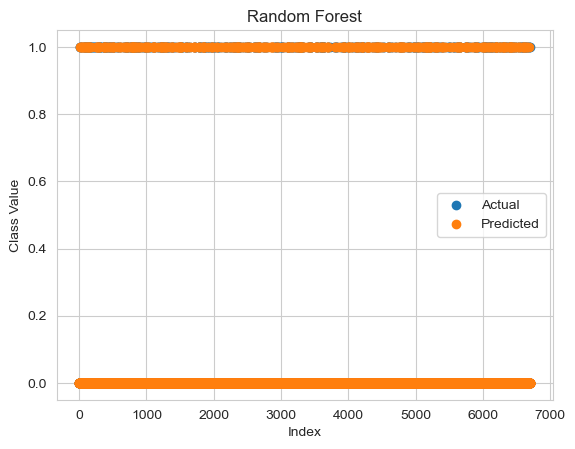

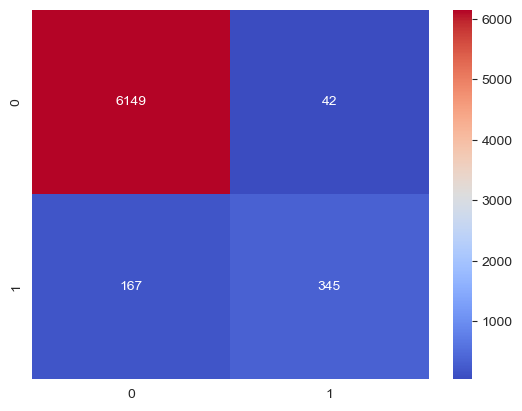

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6191
           1       0.89      0.67      0.77       512

    accuracy                           0.97      6703
   macro avg       0.93      0.83      0.88      6703
weighted avg       0.97      0.97      0.97      6703

Accuracy:  0.9688199313740117
Precision:  0.8914728682170543
Recall:  0.673828125
F1 Score:  0.7675194660734149


In [60]:
from sklearn.ensemble import RandomForestClassifier

lr=RandomForestClassifier(max_depth=10,random_state=99)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Random Forest")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",rf_accuracy)
print("Precision: ",rf_precision)
print("Recall: ",rf_recall)
print("F1 Score: ",rf_f1)

### AdaBoost Classifier

c:\Users\PIULI SAHA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


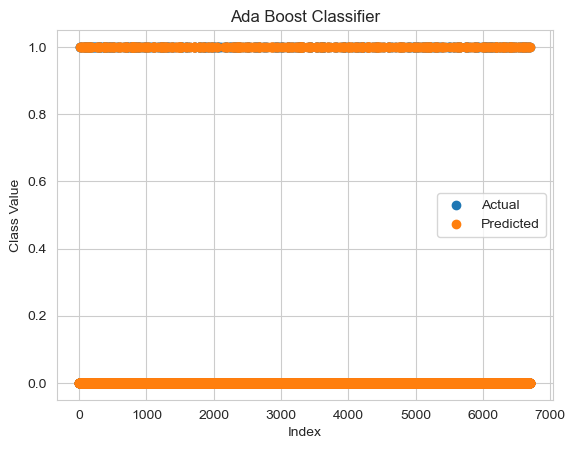

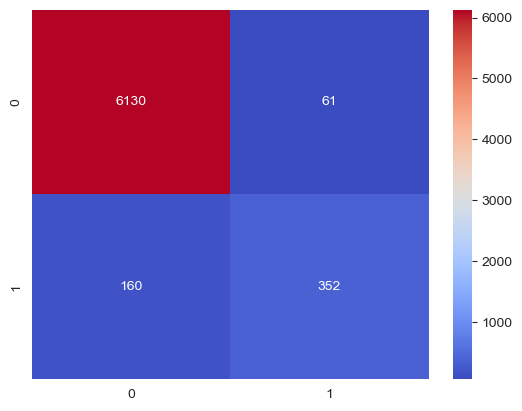

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6191
           1       0.85      0.69      0.76       512

    accuracy                           0.97      6703
   macro avg       0.91      0.84      0.87      6703
weighted avg       0.97      0.97      0.97      6703

Accuracy:  0.9670296881993138
Precision:  0.8523002421307506
Recall:  0.6875
F1 Score:  0.7610810810810811


In [61]:
from sklearn.ensemble import AdaBoostClassifier

lr=AdaBoostClassifier()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Ada Boost Classifier")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

ab_accuracy = accuracy_score(y_test, y_pred)
ab_precision = precision_score(y_test, y_pred)
ab_recall = recall_score(y_test, y_pred)
ab_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",ab_accuracy)
print("Precision: ",ab_precision)
print("Recall: ",ab_recall)
print("F1 Score: ",ab_f1)

In [62]:
acc_series=pd.Series([lr_accuracy,knn_accuracy,nb_accuracy,dt_accuracy,rf_accuracy,ab_accuracy]) * 100
prec_series=pd.Series([lr_precision,knn_precision,nb_precision,dt_precision,rf_precision,ab_precision]) * 100
rec_series=pd.Series([lr_recall,knn_recall,nb_recall,dt_recall,rf_recall,ab_recall]) * 100
f1_series=pd.Series([lr_f1,knn_f1,nb_f1,dt_f1,rf_f1,ab_f1]) * 100
classification_algos=pd.Series(["Logistic Regression","K Nearest Neighbors","Naive Bayes","Decision Trees","Random Forest","Ada Boost"])

performance_df=pd.DataFrame({"Classification Algorithm":classification_algos,"Accuracy":acc_series,"Precision":prec_series,"Recall":rec_series,"F1 Score": f1_series}).set_index("Classification Algorithm")
performance_df

,Accuracy,Precision,Recall,F1 Score
Classification Algorithm,,,,
Logistic Regression,95.151425,74.933333,54.882812,63.359639
K Nearest Neighbors,95.867522,78.450363,63.281250,70.054054
Naive Bayes,89.840370,40.744797,72.656250,52.210526
Decision Trees,96.792481,88.571429,66.601562,76.031215
Random Forest,96.881993,89.147287,67.382812,76.751947
Ada Boost,96.702969,85.230024,68.750000,76.108108


C:\Users\PIULI SAHA\AppData\Local\Temp\ipykernel_26264\525538968.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=sorted_df.index, y=sorted_df[col], width=0.5, ci=None, color=colors[i-1])
C:\Users\PIULI SAHA\AppData\Local\Temp\ipykernel_26264\525538968.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(j, sorted_df[col][j] + 0.5, round(sorted_df[col][j], 2), ha='center', fontsize=10, color="black")
C:\Users\PIULI SAHA\AppData\Local\Temp\ipykernel_26264\525538968.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=sorted_df.index, y=sorted_df[col], width=0.5, ci=None, color=colors[i-1])
C:\Users\PIULI SAHA\AppData\Local\Temp\ipykernel_26264\525538968.py:17: Futur

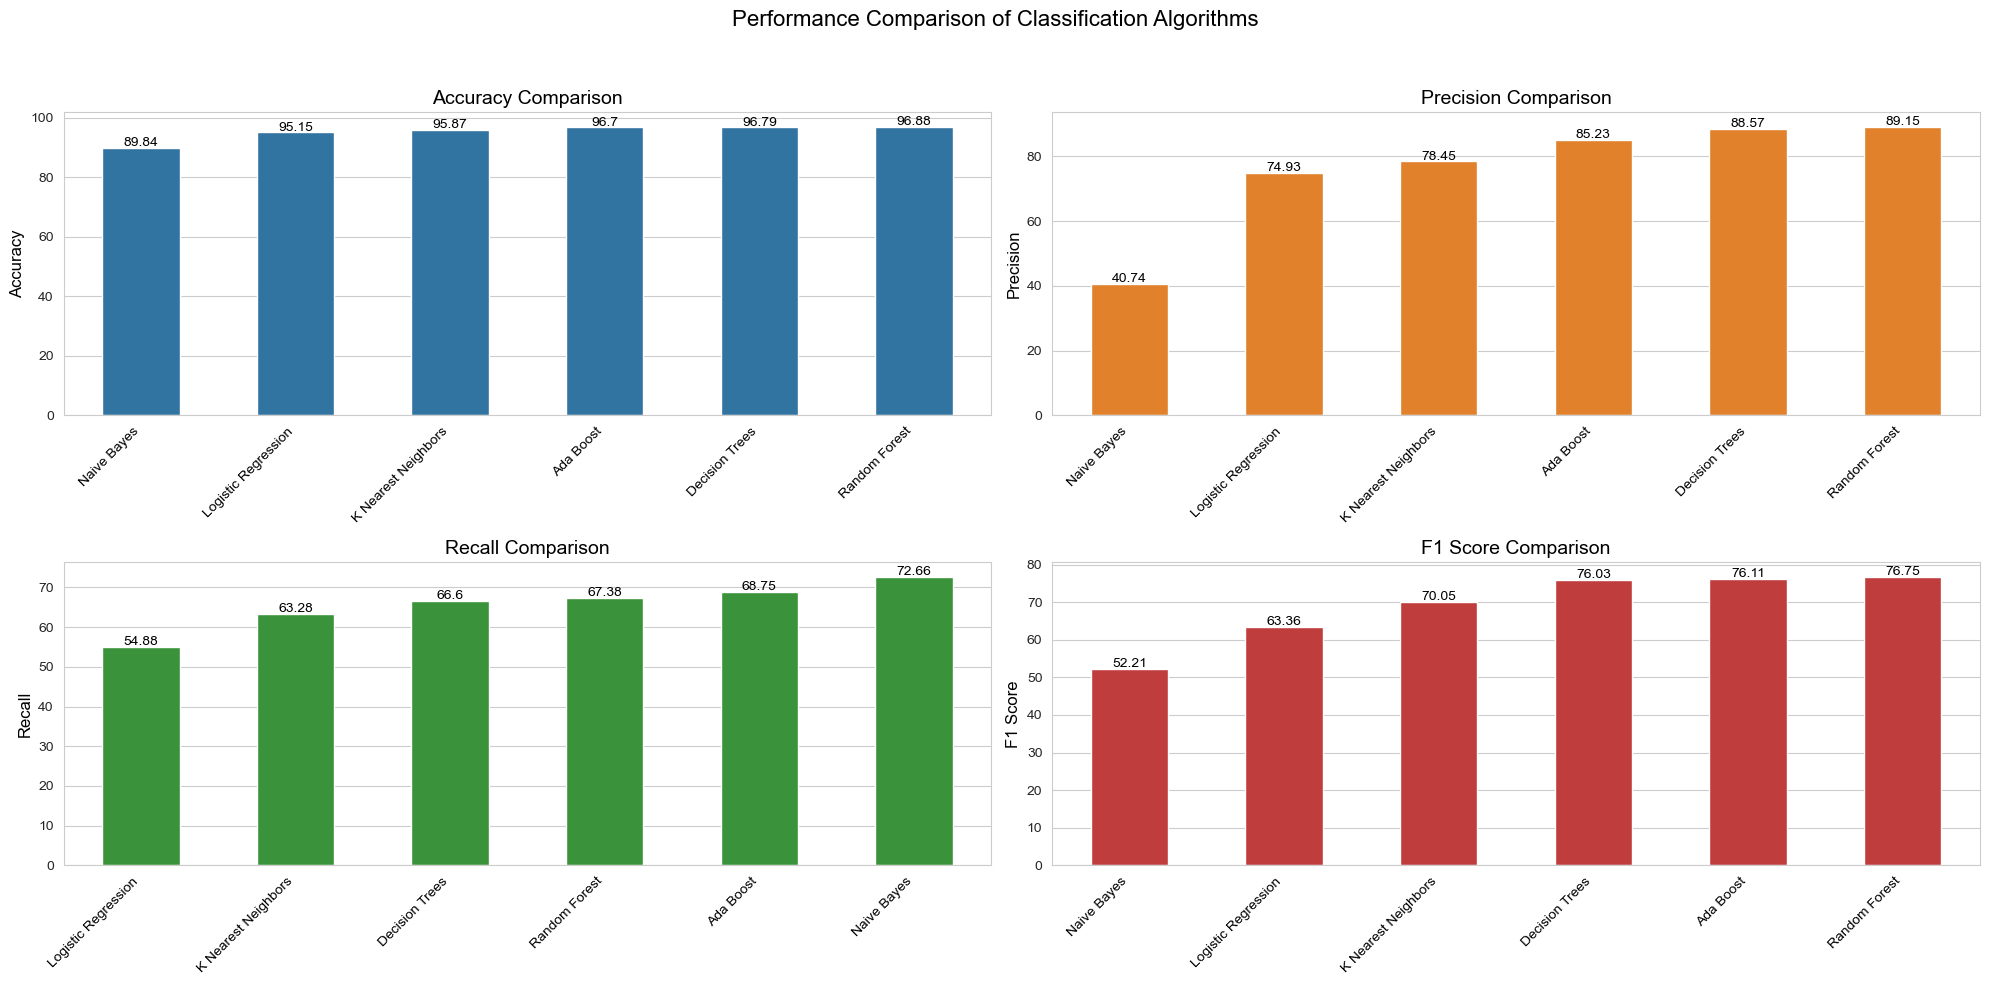

In [63]:
sns.set_style("whitegrid")

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

plt.figure(figsize=(20, 10))
i = 1
for col in performance_df.columns:
    sorted_df = performance_df.sort_values(by=col)
    
    plt.subplot(2, 2, i)
    sns.barplot(x=sorted_df.index, y=sorted_df[col], width=0.5, ci=None, color=colors[i-1])
    plt.title(f"{col} Comparison", fontsize=14, color="black")
    plt.xlabel('')  
    plt.ylabel(col, fontsize=12, color="black")
    plt.xticks(rotation=45, ha='right', fontsize=10, color="black")  
    for j in range(len(sorted_df[col])):
        plt.text(j, sorted_df[col][j] + 0.5, round(sorted_df[col][j], 2), ha='center', fontsize=10, color="black")
    i += 1

plt.suptitle('Performance Comparison of Classification Algorithms', fontsize=16, color="black")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\PIULI SAHA\AppData\Local\Temp\ipykernel_26264\780278051.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sorted_df.index[j], sorted_df[col][j] + 0.5, round(sorted_df[col][j], 2), ha='center', fontsize=13, color="black")
C:\Users\PIULI SAHA\AppData\Local\Temp\ipykernel_26264\780278051.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sorted_df.index[j], sorted_df[col][j] + 0.5, round(sorted_df[col][j], 2), ha='center', fontsize=13, color="black")
C:\Users\PIULI SAHA\AppData\Local\Temp\ipykernel_26264\780278051.py:27: FutureWarning: Series.__getitem__ treating keys as positions is depr

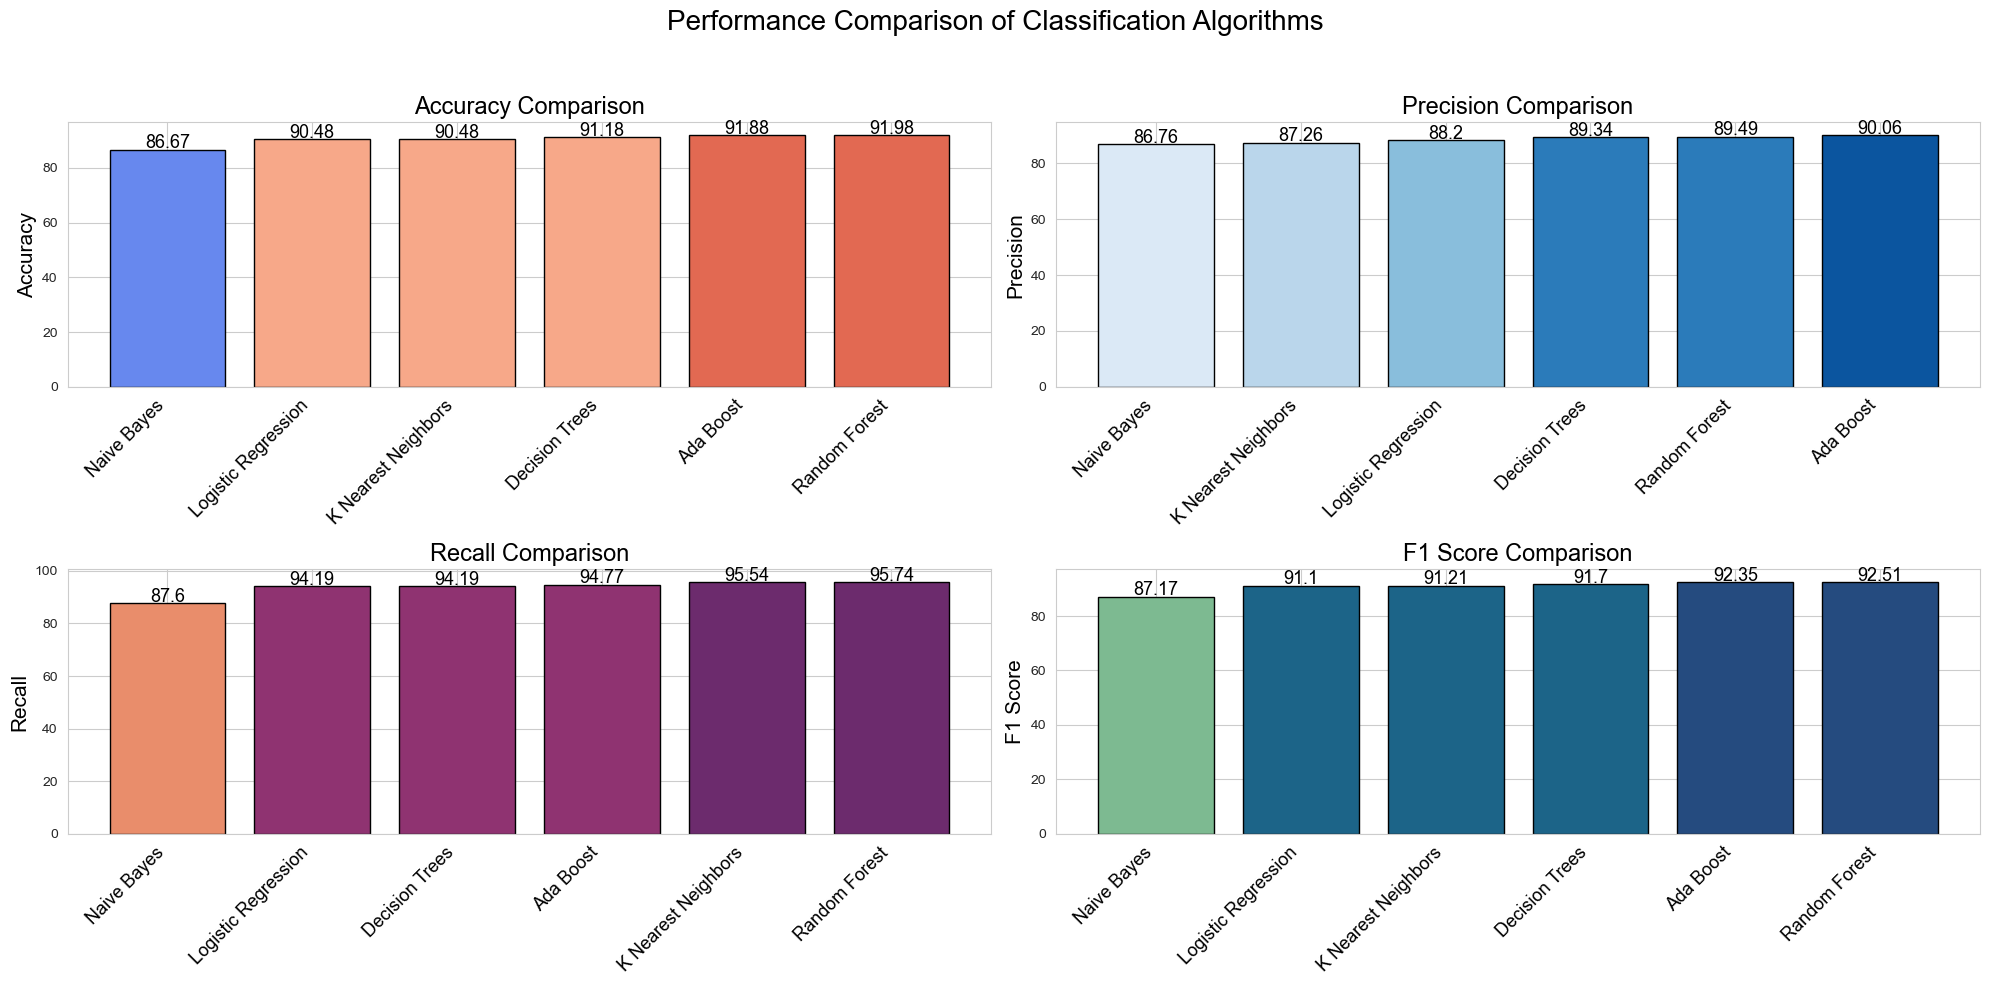

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")

# Define the colormap palette
colors = ["coolwarm", "Blues", "flare", "crest"] 

plt.figure(figsize=(20, 10))
i = 1
for col in performance_df.columns:
    sorted_df = performance_df.sort_values(by=col)
    
    def colors_from_values(values, palette_name):
        normalized = (values - min(values)) / (max(values) - min(values))
        indices = np.round(normalized * (len(palette_name) - 1)).astype(np.int32)
        palette = sns.color_palette(palette_name, len(palette_name))
        return np.array(palette).take(indices, axis=0)
    
    bar_colors = colors_from_values(sorted_df[col], sns.color_palette(colors[i-1], n_colors=len(sorted_df[col])))
    
    plt.subplot(2, 2, i)
    bars = plt.bar(sorted_df.index, sorted_df[col], color=bar_colors, edgecolor='black')
    
    for j in range(len(sorted_df[col])):
        plt.text(sorted_df.index[j], sorted_df[col][j] + 0.5, round(sorted_df[col][j], 2), ha='center', fontsize=13, color="black")
    
    plt.title(f"{col} Comparison", fontsize=17, color="black")
    plt.xlabel('')
    plt.ylabel(col, fontsize=15, color="black")
    plt.xticks(rotation=45, ha='right', fontsize=13, color="black")
    
    i += 1

plt.suptitle('Performance Comparison of Classification Algorithms', fontsize=20, color="black")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Undersampling 

In [65]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=42,sampling_strategy=1.0)
x_res,y_res=rus.fit_resample(x,y)

x_train,x_test,y_train,y_test=tts(x_res,y_res,random_state=99,test_size=0.2)

### Undersampled Logistic Regression

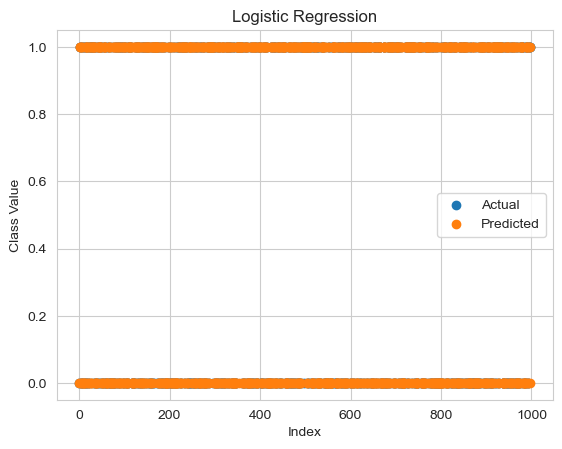

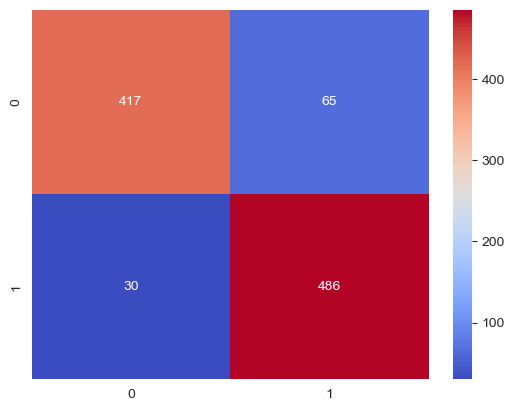

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       482
           1       0.88      0.94      0.91       516

    accuracy                           0.90       998
   macro avg       0.91      0.90      0.90       998
weighted avg       0.91      0.90      0.90       998

Accuracy:  0.9048096192384769
Precision:  0.8820326678765881
Recall:  0.9418604651162791
F1 Score:  0.9109653233364574


In [66]:
from sklearn.linear_model import LogisticRegression 

le=LabelEncoder()
y=le.fit_transform(y)

lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Logistic Regression")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

lr_accuracy = accuracy_score(y_test, y_pred)
lr_precision = precision_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",lr_accuracy)
print("Precision: ",lr_precision)
print("Recall: ",lr_recall)
print("F1 Score: ",lr_f1)

### Undersampled K Nearest Neighbors

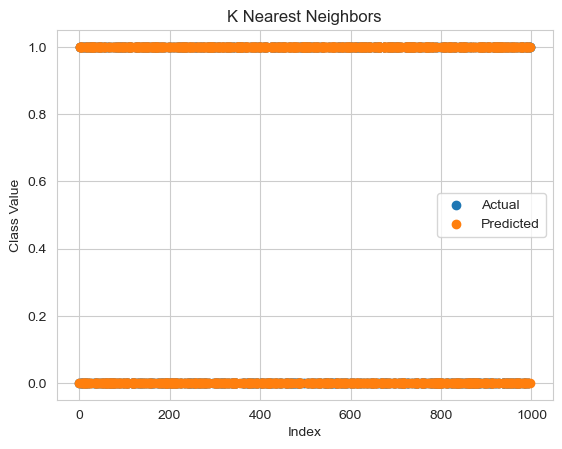

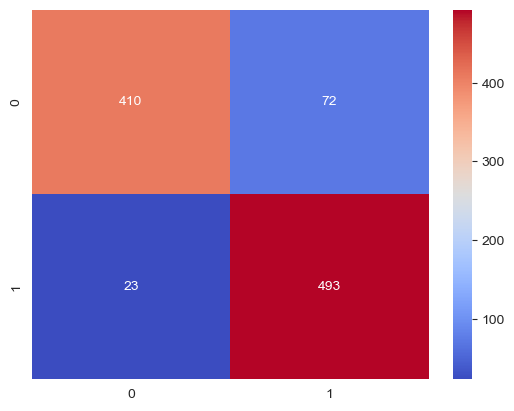

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       482
           1       0.87      0.96      0.91       516

    accuracy                           0.90       998
   macro avg       0.91      0.90      0.90       998
weighted avg       0.91      0.90      0.90       998

Accuracy:  0.9048096192384769
Precision:  0.8725663716814159
Recall:  0.9554263565891473
F1 Score:  0.9121184088806661


In [67]:
from sklearn.neighbors import KNeighborsClassifier

lr=KNeighborsClassifier()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("K Nearest Neighbors")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",knn_accuracy)
print("Precision: ",knn_precision)
print("Recall: ",knn_recall)
print("F1 Score: ",knn_f1)

### Undersampled Naive Bayes

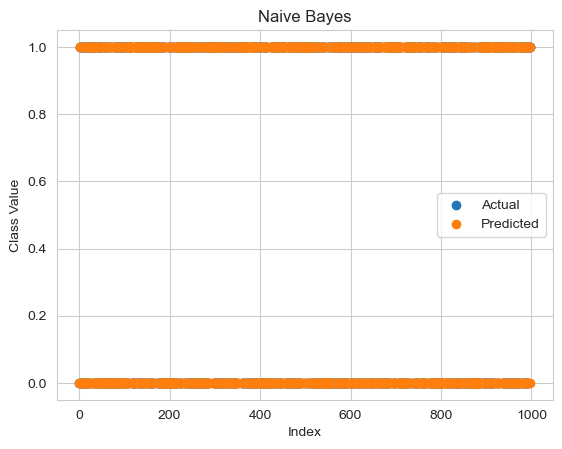

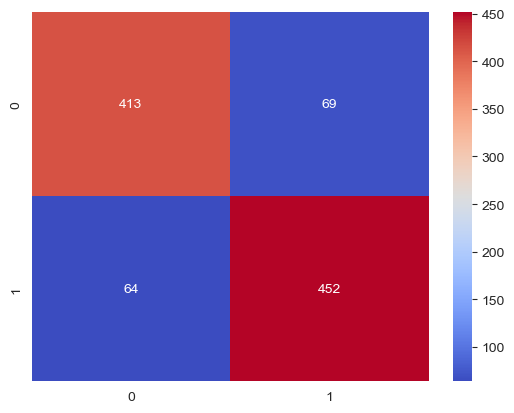

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       482
           1       0.87      0.88      0.87       516

    accuracy                           0.87       998
   macro avg       0.87      0.87      0.87       998
weighted avg       0.87      0.87      0.87       998

Accuracy:  0.8667334669338678
Precision:  0.8675623800383877
Recall:  0.875968992248062
F1 Score:  0.8717454194792671


In [68]:
from sklearn.naive_bayes import GaussianNB

lr=GaussianNB()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Naive Bayes")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",nb_accuracy)
print("Precision: ",nb_precision)
print("Recall: ",nb_recall)
print("F1 Score: ",nb_f1)

### Undersampled Decision Tree

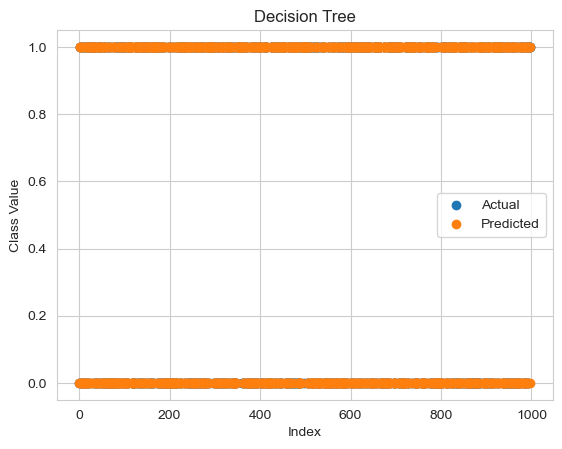

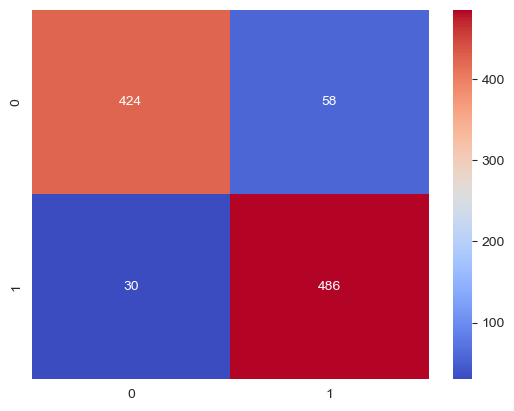

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       482
           1       0.89      0.94      0.92       516

    accuracy                           0.91       998
   macro avg       0.91      0.91      0.91       998
weighted avg       0.91      0.91      0.91       998

Accuracy:  0.9118236472945892
Precision:  0.8933823529411765
Recall:  0.9418604651162791
F1 Score:  0.9169811320754717


In [69]:
from sklearn.tree import DecisionTreeClassifier

lr=DecisionTreeClassifier(max_depth=5)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Decision Tree")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",dt_accuracy)
print("Precision: ",dt_precision)
print("Recall: ",dt_recall)
print("F1 Score: ",dt_f1)

### Undersampled Random Forest

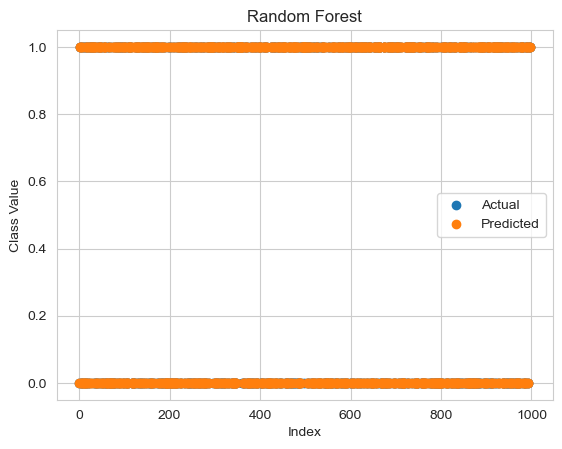

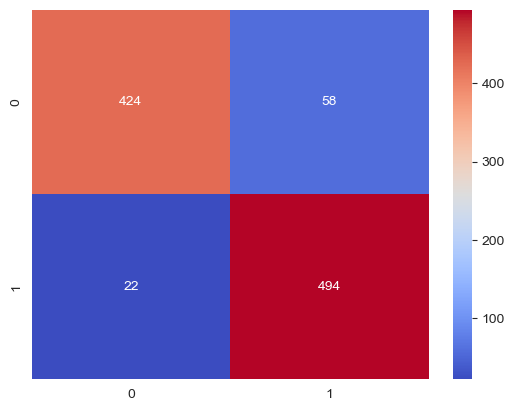

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       482
           1       0.89      0.96      0.93       516

    accuracy                           0.92       998
   macro avg       0.92      0.92      0.92       998
weighted avg       0.92      0.92      0.92       998

Accuracy:  0.9198396793587175
Precision:  0.894927536231884
Recall:  0.9573643410852714
F1 Score:  0.9250936329588015


In [70]:
from sklearn.ensemble import RandomForestClassifier

lr=RandomForestClassifier(random_state=99)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Random Forest")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",rf_accuracy)
print("Precision: ",rf_precision)
print("Recall: ",rf_recall)
print("F1 Score: ",rf_f1)

### Undersampled Ada Boost

c:\Users\PIULI SAHA\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


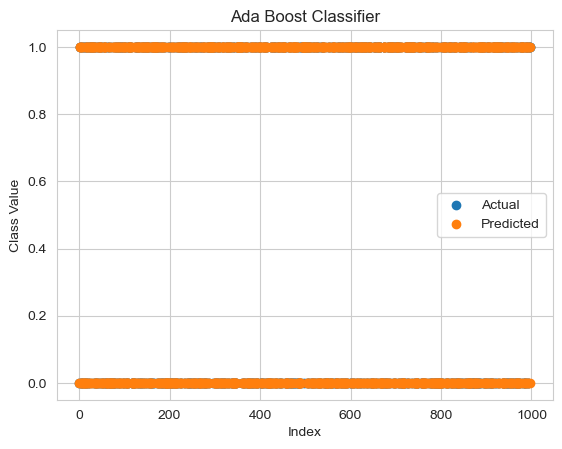

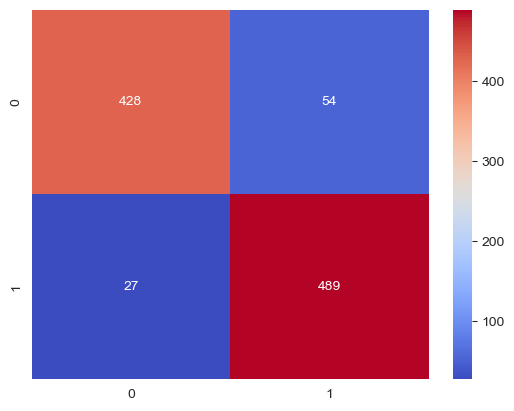

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       482
           1       0.90      0.95      0.92       516

    accuracy                           0.92       998
   macro avg       0.92      0.92      0.92       998
weighted avg       0.92      0.92      0.92       998

Accuracy:  0.9188376753507014
Precision:  0.9005524861878453
Recall:  0.9476744186046512
F1 Score:  0.9235127478753541


In [71]:
from sklearn.ensemble import AdaBoostClassifier

lr=AdaBoostClassifier()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Ada Boost Classifier")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

ab_accuracy = accuracy_score(y_test, y_pred)
ab_precision = precision_score(y_test, y_pred)
ab_recall = recall_score(y_test, y_pred)
ab_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",ab_accuracy)
print("Precision: ",ab_precision)
print("Recall: ",ab_recall)
print("F1 Score: ",ab_f1)

In [72]:
acc_series=pd.Series([lr_accuracy,knn_accuracy,nb_accuracy,dt_accuracy,rf_accuracy,ab_accuracy]) * 100
prec_series=pd.Series([lr_precision,knn_precision,nb_precision,dt_precision,rf_precision,ab_precision]) * 100
rec_series=pd.Series([lr_recall,knn_recall,nb_recall,dt_recall,rf_recall,ab_recall]) * 100
f1_series=pd.Series([lr_f1,knn_f1,nb_f1,dt_f1,rf_f1,ab_f1]) * 100
classification_algos=pd.Series(["Logistic Regression","K Nearest Neighbors","Naive Bayes","Decision Trees","Random Forest","Ada Boost"])

performance_df=pd.DataFrame({"Classification Algorithm":classification_algos,"Accuracy":acc_series,"Precision":prec_series,"Recall":rec_series,"F1 Score": f1_series}).set_index("Classification Algorithm")
performance_df

,Accuracy,Precision,Recall,F1 Score
Classification Algorithm,,,,
Logistic Regression,90.480962,88.203267,94.186047,91.096532
K Nearest Neighbors,90.480962,87.256637,95.542636,91.211841
Naive Bayes,86.673347,86.756238,87.596899,87.174542
Decision Trees,91.182365,89.338235,94.186047,91.698113
Random Forest,91.983968,89.492754,95.736434,92.509363
Ada Boost,91.883768,90.055249,94.767442,92.351275


C:\Users\PIULI SAHA\AppData\Local\Temp\ipykernel_26264\518118617.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sorted_df.index[j], sorted_df[col][j] + 0.5, round(sorted_df[col][j], 2), ha='center', fontsize=13, color="black")
C:\Users\PIULI SAHA\AppData\Local\Temp\ipykernel_26264\518118617.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(sorted_df.index[j], sorted_df[col][j] + 0.5, round(sorted_df[col][j], 2), ha='center', fontsize=13, color="black")
C:\Users\PIULI SAHA\AppData\Local\Temp\ipykernel_26264\518118617.py:23: FutureWarning: Series.__getitem__ treating keys as positions is depr

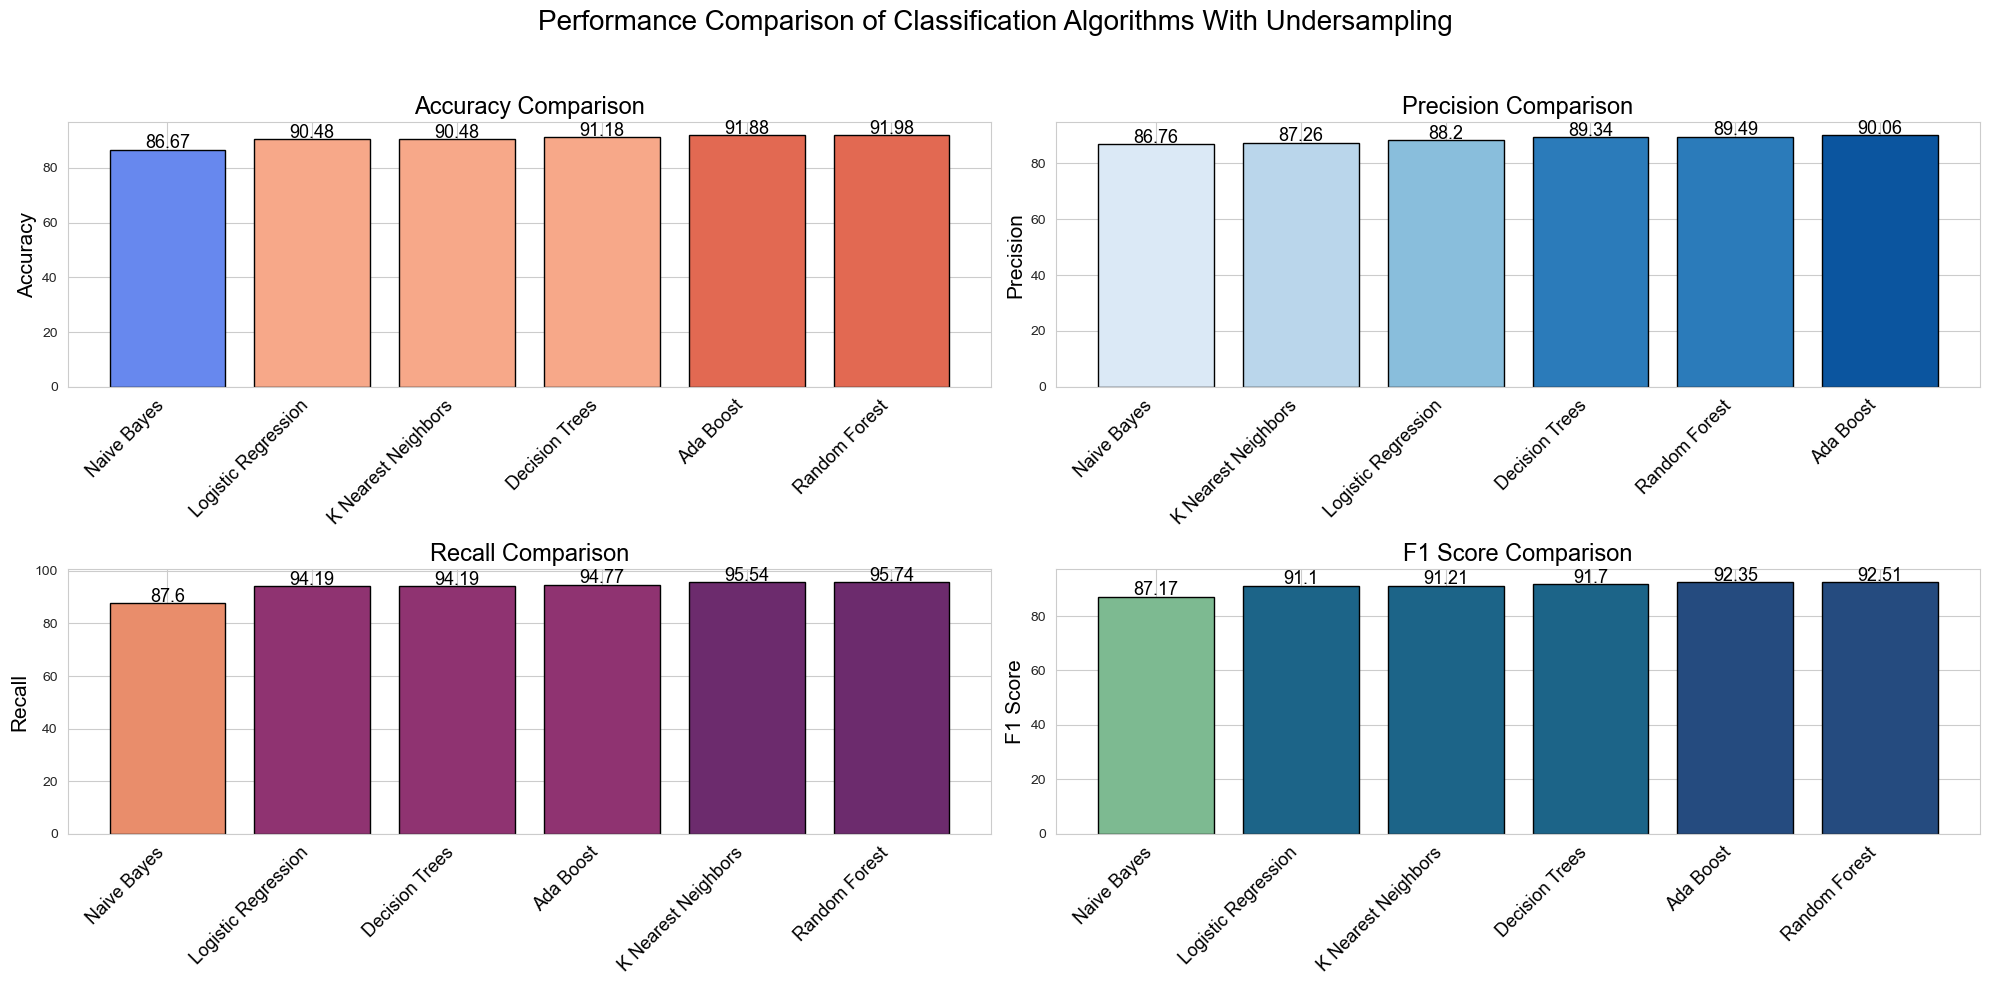

In [73]:
sns.set_style("whitegrid")

# Define the colormap palette
colors = ["coolwarm", "Blues", "flare", "crest"] 

plt.figure(figsize=(20, 10))
i = 1
for col in performance_df.columns:
    sorted_df = performance_df.sort_values(by=col)
    
    def colors_from_values(values, palette_name):
        normalized = (values - min(values)) / (max(values) - min(values))
        indices = np.round(normalized * (len(palette_name) - 1)).astype(np.int32)
        palette = sns.color_palette(palette_name, len(palette_name))
        return np.array(palette).take(indices, axis=0)
    
    bar_colors = colors_from_values(sorted_df[col], sns.color_palette(colors[i-1], n_colors=len(sorted_df[col])))
    
    plt.subplot(2, 2, i)
    bars = plt.bar(sorted_df.index, sorted_df[col], color=bar_colors, edgecolor='black')
    
    for j in range(len(sorted_df[col])):
        plt.text(sorted_df.index[j], sorted_df[col][j] + 0.5, round(sorted_df[col][j], 2), ha='center', fontsize=13, color="black")
    
    plt.title(f"{col} Comparison", fontsize=17, color="black")
    plt.xlabel('')
    plt.ylabel(col, fontsize=15, color="black")
    plt.xticks(rotation=45, ha='right', fontsize=13, color="black")
    
    i += 1

plt.suptitle('Performance Comparison of Classification Algorithms With Undersampling', fontsize=20, color="black")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Balanced Bagging Random Forest

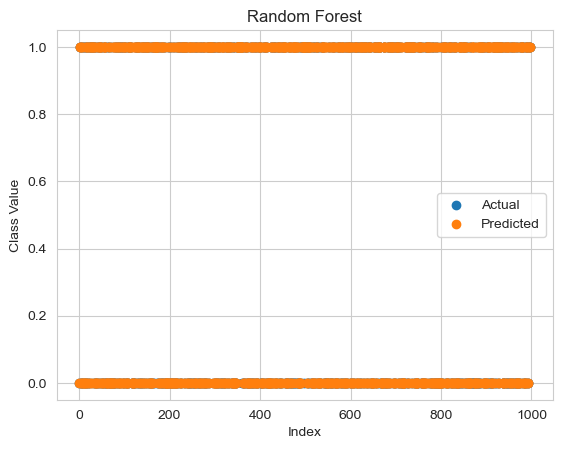

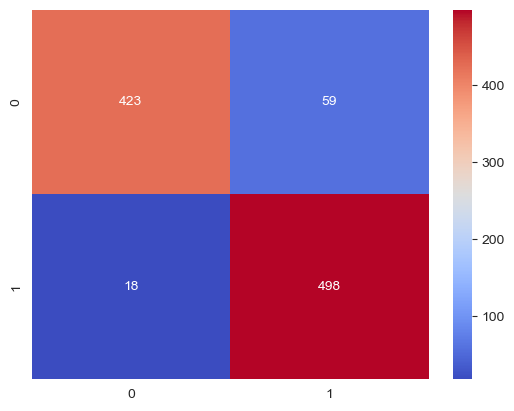

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       482
           1       0.89      0.97      0.93       516

    accuracy                           0.92       998
   macro avg       0.93      0.92      0.92       998
weighted avg       0.93      0.92      0.92       998

Accuracy:  0.9228456913827655
Precision:  0.8940754039497307
Recall:  0.9651162790697675
F1 Score:  0.9282385834109972


In [76]:
from imblearn.ensemble import BalancedBaggingClassifier

rfc=RandomForestClassifier(max_depth=10,random_state=99)
bbc=BalancedBaggingClassifier(rfc,n_estimators=10,sampling_strategy="auto")

bbc.fit(x_train,y_train)
y_pred=bbc.predict(x_test)

comparisonDf=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparisonDf

plt.scatter(comparisonDf.index,comparisonDf["Actual"],label="Actual")
plt.scatter(comparisonDf.index,comparisonDf["Predicted"],label="Predicted")
plt.legend()
plt.title("Random Forest")
plt.xlabel("Index")
plt.ylabel("Class Value")
plt.show()

conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="coolwarm",annot=True,fmt="d")
plt.show()

print(classification_report(y_test,y_pred))

rn_accuracy = accuracy_score(y_test, y_pred)
rn_precision = precision_score(y_test, y_pred)
rn_recall = recall_score(y_test, y_pred)
rn_f1 = f1_score(y_test, y_pred)

print("Accuracy: ",rn_accuracy)
print("Precision: ",rn_precision)
print("Recall: ",rn_recall)
print("F1 Score: ",rn_f1)